In [1]:
import numpy as np 
import pandas as pd


In [2]:
PREFIX="simba_"
#PREFIX="eyeriss_"

In [3]:
df = pd.read_csv(f"data/{PREFIX}energy_d.csv", sep=";", header=None)
df.columns = ["d_lambda", "timeloop_energy", "timeloop_comp", "timeloop_data", "jirka_comp", "jirka_data"]
df

,d_lambda,timeloop_energy,timeloop_comp,timeloop_data,jirka_comp,jirka_data
0,8,5.614297e+07,4.926404e+06,5.121656e+07,8784600,1263808
1,16,9.720638e+07,9.852807e+06,8.735357e+07,17569200,2527616
2,24,1.510118e+08,1.477921e+07,1.362326e+08,26353800,3791424
3,32,1.966131e+08,1.970561e+07,1.769074e+08,35138400,5055232
4,40,2.412154e+08,2.463202e+07,2.165834e+08,43923000,6319040
...,...,...,...,...,...,...
59,480,2.838595e+09,2.955842e+08,2.543010e+09,527076000,75828480
60,488,2.975846e+09,3.005106e+08,2.675335e+09,535860600,77092288
61,496,2.738976e+09,3.054370e+08,2.433539e+09,544645200,78356096
62,504,3.289278e+09,3.103634e+08,2.978915e+09,553429800,79619904


In [4]:
df = df[["d_lambda", "timeloop_data"]]
df["d_lambda_sq"] = df["d_lambda"]*df["d_lambda"]

/home/petra/miniconda3/envs/accelergy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
df

,d_lambda,timeloop_data,d_lambda_sq
0,8,5.121656e+07,64
1,16,8.735357e+07,256
2,24,1.362326e+08,576
3,32,1.769074e+08,1024
4,40,2.165834e+08,1600
...,...,...,...
59,480,2.543010e+09,230400
60,488,2.675335e+09,238144
61,496,2.433539e+09,246016
62,504,2.978915e+09,254016


# Statistical test using smf.osl

In [6]:
import statsmodels.formula.api as smf


In [7]:
model = smf.ols(formula='timeloop_data ~ d_lambda + d_lambda_sq', data=df)
results = model.fit()

In [8]:
results

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          timeloop_data   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     839.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           4.12e-45
Time:                        12:35:12   Log-Likelihood:                -1297.1
No. Observations:                  64   AIC:                             2600.
Df Residuals:                      61   BIC:                             2607.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.158e+06   6.08e+07      0.052      0.959   -1.18e+08    1.25e+08
d_lambda     5.133e+06   5.39e+05      9.517      0.000    4.05e+06    6.21e+06
d_lambda_sq   595.0835   1005.230      0.592      0.556   -1414.997    2605.165
==============================================================================
Omnibus:                       54.084   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.612
Skew:                           2.358   Prob(JB):                     1.75e-64
Kurtosis:                      12.374   Cond. No.                     3.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
print(results.pvalues)

Intercept      9.587348e-01
d_lambda       1.144896e-13
d_lambda_sq    5.560467e-01
dtype: float64


In [11]:
results.pvalues["d_lambda_sq"]

0.5560467483864759

In [12]:
results.pvalues[results.pvalues > .05]

Intercept      0.958735
d_lambda_sq    0.556047
dtype: float64

# Statistical test using OSL

In [13]:
import statsmodels.api as sm

In [14]:
Y=df["timeloop_data"]
X=df[["d_lambda", "d_lambda_sq"]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const          3.157640e+06
d_lambda       5.132678e+06
d_lambda_sq    5.950835e+02
dtype: float64

# Figure

In [15]:
from scipy import stats
m, c, r, p, se = stats.linregress(df["d_lambda"], df["timeloop_data"])

print(m, c)

df["linear"] = m*df["d_lambda"]+c
df

5442121.661790551 -24073382.9738245


/home/petra/miniconda3/envs/accelergy/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,d_lambda,timeloop_data,d_lambda_sq,linear
0,8,5.121656e+07,64,1.946359e+07
1,16,8.735357e+07,256,6.300056e+07
2,24,1.362326e+08,576,1.065375e+08
3,32,1.769074e+08,1024,1.500745e+08
4,40,2.165834e+08,1600,1.936115e+08
...,...,...,...,...
59,480,2.543010e+09,230400,2.588145e+09
60,488,2.675335e+09,238144,2.631682e+09
61,496,2.433539e+09,246016,2.675219e+09
62,504,2.978915e+09,254016,2.718756e+09


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

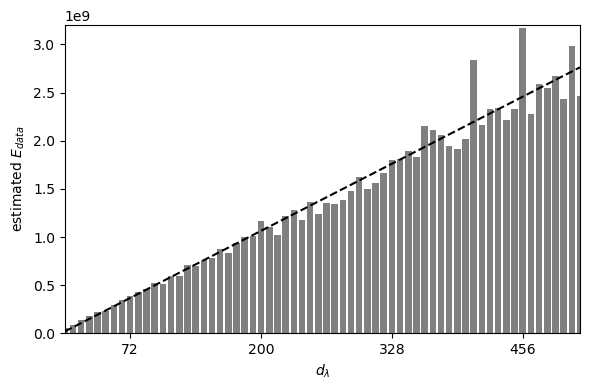

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

dfx = df[["d_lambda", "timeloop_data", "linear"]]

sns.barplot(data=dfx, x="d_lambda", y="timeloop_data", color="gray")
sns.lineplot(data=dfx, x=dfx.index, y="linear", ls="--", color="black")

ax.set(xlabel="$d_{\lambda}$")
ax.set(ylabel="estimated $E_{data}$")
ax.set(ylim=(0,3.2e09))
ax.set(xlim=(0,63))
ax.set_xticks(list(range(8,64,16)));

fig.tight_layout()
fig.savefig(f"{PREFIX}linear_trend_d.png", bbox_inches="tight")


In [18]:
dfx

,d_lambda,timeloop_data,linear
0,8,5.121656e+07,1.946359e+07
1,16,8.735357e+07,6.300056e+07
2,24,1.362326e+08,1.065375e+08
3,32,1.769074e+08,1.500745e+08
4,40,2.165834e+08,1.936115e+08
...,...,...,...
59,480,2.543010e+09,2.588145e+09
60,488,2.675335e+09,2.631682e+09
61,496,2.433539e+09,2.675219e+09
62,504,2.978915e+09,2.718756e+09
